**Steps:**
1. Loading Dataset 
2. Data Preparation
* Select required columns
* Remove Punctuation marks
* Lowercase all text
* Remove HTML characters
* Remove \n
* Remove Non English characters

3. Exploratory Data Analysis
* Word Cloud
4. Data Modeling and tokenization
* Stop words removal
* Vectorization and Tokenization
* Lemmatization
* POS Tagging
5. Model Building
* LDA Modelling
6. Model Evaluations
* Model Visualization
* Coherance Score

# ***Import packages***

In [ ]:
import pandas as pd

# ***Loading Dataset***

In [ ]:
papers_location = 'papers.csv'
papers = pd.read_csv(papers_location)

In [ ]:
papers.sample(10)

id  year                                              title  \
3888   452  1991  Obstacle Avoidance through Reinforcement Learning   
1715  2559  2004  Spike Sorting: Bayesian Clustering of Non-Stat...   
766   1700  1999  Regular and Irregular Gallager-zype Error-Corr...   
3274  3966  2010  Stability Approach to Regularization Selection...   
4125  4733  2012              Fast Resampling Weighted v-Statistics   
684   1626  1998  A Phase Space Approach to Minimax Entropy Lear...   
3341  4025  2010                       Throttling Poisson Processes   
4304  4896  2013  Learning Kernels Using Local Rademacher Comple...   
3451  4125  2010              A Dirty Model for Multi-task Learning   
2035  2849  2005  Phase Synchrony Rate for the Recognition of Mo...   

     event_type                                           pdf_name  \
3888        NaN  452-obstacle-avoidance-through-reinforcement-l...   
1715        NaN  2559-spike-sorting-bayesian-clustering-of-non-...   
766         NaN  1700-regular-and-irregular-gallager-zype-error...   
3274        NaN  3966-stability-approach-to-regularization-sele...   
4125        NaN     4733-fast-resampling-weighted-v-statistics.pdf   
684         NaN  1626-a-phase-space-approach-to-minimax-entropy...   
3341        NaN              4025-throttling-poisson-processes.pdf   
4304  Spotlight  4896-learning-kernels-using-local-rademacher-c...   
3451        NaN     4125-a-dirty-model-for-multi-task-learning.pdf   
2035        NaN  2849-phase-synchrony-rate-for-the-recognition-...   

                                               abstract  \
3888                                   Abstract Missing   
1715                                   Abstract Missing   
766                                    Abstract Missing   
3274  A challenging problem in estimating high-dimen...   
4125  In this paper, a novel, computationally fast, ...   
684                                    Abstract Missing   
3341  We study a setting in which Poisson processes ...   
4304  We use the notion of local Rademacher complexi...   
3451  We consider the multiple linear regression pro...   
2035                                   Abstract Missing   

                                             paper_text  
3888  Obstacle Avoidance through Reinforcement\nLear...  
1715  Spike Sorting: Bayesian Clustering of\nNon-Sta...  
766   Regular and Irregular Gallager-type\nError-Cor...  
3274  Stability Approach to Regularization Selection...  
4125  Fast Resampling Weighted v-Statistics\nChunxia...  
684   A Phase Space Approach to Minimax\nEntropy Lea...  
3341  Throttling Poisson Processes\n\n?\nThomas Vanc...  
4304  Learning Kernels Using\nLocal Rademacher Compl...  
3451  A Dirty Model for Multi-task Learning\n\nAli J...  
2035  Phase Synchrony Rate for the Recognition of\nM...

In [ ]:
papers.columns

Index(['id', 'year', 'title', 'event_type', 'pdf_name', 'abstract',
       'paper_text'],
      dtype='object')

In [ ]:
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1)
papers

year                                              title  \
0     1987  Self-Organization of Associative Database and ...   
1     1987  A Mean Field Theory of Layer IV of Visual Cort...   
2     1988  Storing Covariance by the Associative Long-Ter...   
3     1994  Bayesian Query Construction for Neural Network...   
4     1994  Neural Network Ensembles, Cross Validation, an...   
...    ...                                                ...   
7236  1994                Single Transistor Learning Synapses   
7237  1994  Bias, Variance and the Combination of Least Sq...   
7238  1994          A Real Time Clustering CMOS Neural Engine   
7239  1994  Learning direction in global motion: two class...   
7240  1994  Correlation and Interpolation Networks for Rea...   

              abstract                                         paper_text  
0     Abstract Missing  767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...  
1     Abstract Missing  683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...  
2     Abstract Missing  394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...  
3     Abstract Missing  Bayesian Query Construction for Neural\nNetwor...  
4     Abstract Missing  Neural Network Ensembles, Cross\nValidation, a...  
...                ...                                                ...  
7236  Abstract Missing  Single Transistor Learning Synapses\n\nPaul Ha...  
7237  Abstract Missing  Bias, Variance and the Combination of\nLeast S...  
7238  Abstract Missing  A Real Time Clustering CMOS\nNeural Engine\nT....  
7239  Abstract Missing  Learning direction in global motion: two\nclas...  
7240  Abstract Missing  Correlation and Interpolation Networks for\nRe...  

[7241 rows x 4 columns]

***Suggestion:***
If your machine has low resources you can randomly Select N documents
with N = 1000

In [ ]:
papers = papers.sample(100)

In [ ]:
papers.sample(10)

year                                              title  \
1928  2005  Learning Shared Latent Structure for Image Syn...   
4596  2013  Global MAP-Optimality by Shrinking the Combina...   
6218  2017  Uprooting and Rerooting Higher-Order Graphical...   
225   1996  For Valid Generalization the Size of the Weigh...   
2961  2009  Manifold Regularization for SIR with Rate Root...   
1240  1989  Connectionist Architectures for Multi-Speaker ...   
1635  2003  Application of SVMs for Colour Classification ...   
5337  2015                    Combinatorial Bandits Revisited   
633   1988  Neural Networks that Learn to Discriminate Sim...   
4734  2014  Learning From Weakly Supervised Data by The Ex...   

                                               abstract  \
1928                                   Abstract Missing   
4596  We consider energy minimization for undirected...   
6218  The idea of uprooting and rerooting graphical ...   
225                                    Abstract Missing   
2961  In this paper, we study the manifold regulariz...   
1240                                   Abstract Missing   
1635                                   Abstract Missing   
5337  This paper investigates stochastic and adversa...   
633                                    Abstract Missing   
4734  In many situations we have some measurement of...   

                                             paper_text  
1928  Learning Shared Latent Structure for Image\nSy...  
4596  Global MAP-Optimality by Shrinking the\nCombin...  
6218  Uprooting and Rerooting Higher-Order Graphical...  
225   For valid generalization, the size of the\nwei...  
2961  Manifold Regularization for SIR with Rate Root...  
1240  Connectionist Architectures for Multi-Speaker ...  
1635  Application of SVMs for Colour Classification\...  
5337  Combinatorial Bandits Revisited\nRichard Combe...  
633   332\n\nNEURAL NETWORKS THAT LEARN TO\nDISCRIMI...  
4734  Learning From Weakly Supervised Data by The\nE...

# ***Data Preparation***

### 1. Removing punctuations

Cleaning original paper content by removing any punctuations as they are not needed for analysis and just adding weight to cause unnecessary processing.

In [ ]:
import re

In [ ]:
papers['clean_text'] = papers['paper_text'].map(lambda x: re.sub('[,\.!?]()', '', x))

In [ ]:
papers['clean_text']

4123    Clustering Aggregation as\nMaximum-Weight Inde...
4141    Automatic Feature Induction\nfor Stagewise Col...
5890    Short-Dot: Computing Large Linear Transforms\n...
704     Generalized Model Selection For Unsupervised\n...
5130    3D Object Proposals for Accurate Object Class\...
                              ...                        
3444    b-Bit Minwise Hashing for Estimating Three-Way...
2682    An Homotopy Algorithm for the Lasso with Onlin...
5462    Fast and Guaranteed Tensor Decomposition via\n...
225     For valid generalization the size of the\nweig...
4414    Sparse nonnegative deconvolution for compressi...
Name: clean_text, Length: 100, dtype: object

### 2. Removing Digits and all words with digits into it

In [ ]:
papers['clean_text'] = papers['clean_text'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [ ]:
papers['clean_text']

4123    Clustering Aggregation as\nMaximum-Weight Inde...
4141    Automatic Feature Induction\nfor Stagewise Col...
5890    Short-Dot: Computing Large Linear Transforms\n...
704     Generalized Model Selection For Unsupervised\n...
5130     Object Proposals for Accurate Object Class\nD...
                              ...                        
3444    b-Bit Minwise Hashing for Estimating Three-Way...
2682    An Homotopy Algorithm for the Lasso with Onlin...
5462    Fast and Guaranteed Tensor Decomposition via\n...
225     For valid generalization the size of the\nweig...
4414    Sparse nonnegative deconvolution for compressi...
Name: clean_text, Length: 100, dtype: object

### 3. Lowercase all text:

In [ ]:
papers['clean_text'] = papers['clean_text'].map(lambda x: x.lower())

In [ ]:
papers['clean_text'].sample(10)

5442    quartz: randomized dual coordinate ascent\nwit...
6699    synchronization and grammatical inference\nin ...
6362    nearest-neighbor sample compression:\nefficien...
4414    sparse nonnegative deconvolution for compressi...
774     bayesian averaging is well-temperated\n\nlars ...
225     for valid generalization the size of the\nweig...
704     generalized model selection for unsupervised\n...
36      neuron-mos temporal winner search\nhardware fo...
1315    dyadic classification trees\nvia\nstructural r...
633     \n\nneural networks that learn to\ndiscriminat...
Name: clean_text, dtype: object

### 4. Remove HTML characters

In [ ]:
html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
papers['clean_text'] = papers['clean_text'].apply(lambda x: re.sub(html,'', x))

In [ ]:
papers['clean_text'].sample(10)

2615    the price of bandit information\nfor online op...
1108    information geometrical framework for\nanalyzi...
4123    clustering aggregation as\nmaximum-weight inde...
5697    active learning with oracle epiphany\n\ntzu-ku...
6218    uprooting and rerooting higher-order graphical...
6180    training and evaluating multimodal word\nembed...
633     \n\nneural networks that learn to\ndiscriminat...
5337    combinatorial bandits revisited\nrichard combe...
4089    collaborative gaussian processes for\npreferen...
4734    learning from weakly supervised data by the\ne...
Name: clean_text, dtype: object

### 5. Remove \n

In [ ]:
papers['clean_text'] = papers['clean_text'].apply(lambda x: re.sub('\n','', x))

In [ ]:
papers['clean_text'].sample(10)

1375    Replay Repair and ConsolidationSzabolcs KaliIn...
6218    Uprooting and Rerooting Higher-Order Graphical...
5003    Propagation Filters in PDS Networks forSequenc...
3059    Reconstruction of Sparse Circuits UsingMulti-n...
184     Bayesian Methods for Mixtures of ExpertsSteve ...
4070    Generalization Bounds for Domain AdaptationCha...
1240    Connectionist Architectures for Multi-Speaker ...
6699    Synchronization and Grammatical Inferencein an...
2682    An Homotopy Algorithm for the Lasso with Onlin...
1535    ICA-Based Clustering of Genes fromMicroarray E...
Name: clean_text, dtype: object

### 6. Remove Non-English characters

In [ ]:
papers['clean_text'] = papers['clean_text'].apply(lambda x: re.sub(r'[^\x00-\x7f]',r'', x))

In [ ]:
papers['clean_text'].sample(10)

3040    nash equilibria of static prediction gamesmich...
1259    efficient learning equilibrium *ronen i brafma...
184     bayesian methods for mixtures of expertssteve ...
5548    mixing time estimation in reversible markovcha...
1635    application of svms for colour classificationa...
5637    active nearest-neighbor learning in metric spa...
4568    probabilistic principal geodesic analysisp tho...
5442    quartz: randomized dual coordinate ascentwith ...
1536    max-margin markov networksben taskar carlos gu...
1535    ica-based clustering of genes frommicroarray e...
Name: clean_text, dtype: object

# ***Exploratory Data (Text) analysis:***

* Word Cloud

### Creating the word cloud (EDA)

In [ ]:
from wordcloud import WordCloud
def create_word_cloud(target_df, column_name):
  print('Joining all words into long text....')
  full_text = ','.join(list(target_df[column_name].values))
  wordcloud = WordCloud(background_color="black", 
                        max_words=100,  # top 100 words in the
                        contour_width=2, 
                        contour_color='yellow')
  print('Creating word cloud')
  wordcloud.generate(full_text)
  return wordcloud

Joining all words into long text....
Creating word cloud


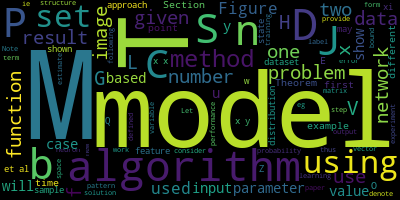

In [ ]:
# For 7240 records the text will be quite a large so this step may take some time to complete.
wordcloud = create_word_cloud(papers, 'clean_text')
wordcloud.to_image()

# ***Data Modeling and Tokenization***

## 1. Removing stop words and Lemmatization

**Remove Stopwords**

* Text Classification:
Spam Filtering /
Language Classification / 
Genre Classification
* Caption Generation
* Auto-Tag Generation
* Topic Modeling

**Avoid Stopword Removal**

* Machine Translation
* Language Modeling
* Text Summarization
* Question-Answering problems

### 1.1 Using gensim NLTK library for removing stop words

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['has', 'been', 're', 'com', 'edu', 'use'])

In [ ]:
# If you set deacc=True which will removes the punctuations (that we already removed)
def convert_sentences_to_words(sentences):
    for sentence in sentences:        
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [ ]:
def remove_all_stop_words(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [ ]:
text_to_list = papers.clean_text.values.tolist()

In [ ]:
len(text_to_list)
# all 7241 lines are sentenses now

100

In [ ]:
text_as_words = list(convert_sentences_to_words(text_to_list))

In [ ]:
len(text_as_words)

100

In [ ]:
print(text_as_words[0])

['clustering', 'aggregation', 'as', 'maximum', 'weight', 'independent', 'set', 'nan', 'li', 'longin', 'jan', 'latecki', 'department', 'of', 'computer', 'and', 'information', 'sciences', 'temple', 'university', 'philadelphia', 'usa', 'nanlilatecki', 'templeedu', 'abstract', 'we', 'formulate', 'clustering', 'aggregation', 'as', 'special', 'instance', 'of', 'maximum', 'weight', 'independent', 'set', 'mwis', 'problem', 'for', 'given', 'dataset', 'an', 'attributed', 'graph', 'is', 'constructed', 'from', 'the', 'union', 'of', 'the', 'input', 'clusterings', 'generated', 'by', 'different', 'underlying', 'clustering', 'algorithms', 'with', 'different', 'parameters', 'the', 'vertices', 'which', 'represent', 'the', 'distinct', 'clusters', 'are', 'weighted', 'by', 'an', 'internal', 'index', 'measuring', 'both', 'cohesion', 'and', 'separation', 'the', 'edges', 'connect', 'the', 'vertices', 'whose', 'corresponding', 'clusters', 'overlap', 'intuitively', 'an', 'optimal', 'aggregated', 'clustering', '

In [ ]:
# remove stop words
clean_words = remove_all_stop_words(text_as_words)

In [ ]:
len(clean_words)

100

In [ ]:
print(clean_words[0])

['clustering', 'aggregation', 'maximum', 'weight', 'independent', 'set', 'nan', 'li', 'longin', 'jan', 'latecki', 'department', 'computer', 'information', 'sciences', 'temple', 'university', 'philadelphia', 'usa', 'nanlilatecki', 'templeedu', 'abstract', 'formulate', 'clustering', 'aggregation', 'special', 'instance', 'maximum', 'weight', 'independent', 'set', 'mwis', 'problem', 'given', 'dataset', 'attributed', 'graph', 'constructed', 'union', 'input', 'clusterings', 'generated', 'different', 'underlying', 'clustering', 'algorithms', 'different', 'parameters', 'vertices', 'represent', 'distinct', 'clusters', 'weighted', 'internal', 'index', 'measuring', 'cohesion', 'separation', 'edges', 'connect', 'vertices', 'whose', 'corresponding', 'clusters', 'overlap', 'intuitively', 'optimal', 'aggregated', 'clustering', 'obtained', 'selecting', 'optimal', 'subset', 'non', 'overlapping', 'clusters', 'partitioning', 'dataset', 'together', 'formalize', 'intuition', 'mwis', 'problem', 'attributed'

In [ ]:
len(clean_words[0])

2516

In [ ]:
print(clean_words[:1][0][:20])

['clustering', 'aggregation', 'maximum', 'weight', 'independent', 'set', 'nan', 'li', 'longin', 'jan', 'latecki', 'department', 'computer', 'information', 'sciences', 'temple', 'university', 'philadelphia', 'usa', 'nanlilatecki']


## 2. Creating Bigram *(2 words compound words)* and Trigram *(3 words compound words)*

In [ ]:
# Note if you will use higher threshold, which will return the fewer phrases.
bigram = gensim.models.Phrases(clean_words, min_count=5, threshold=100) 
trigram = gensim.models.Phrases(bigram[clean_words], threshold=100)  

/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

● Bigrams: Tokens of two consecutive written words known as Bigram <br>
● Trigrams: Tokens of three consecutive written words known as Trigram <br>
● Ngrams: Tokens of an number of consecutive written words known as Ngram

##3. Lemmatization

In [ ]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

##4. Using Spacy library for removing stop words

In [ ]:
# Importing spacy and Loading model
import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
# Form Bigrams
clean_words_bigrams = make_bigrams(clean_words)

In [ ]:
# Do lemmatization keeping only noun, adj, vb, adv
clean_words_lemmatized = lemmatization(clean_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [ ]:
print(clean_words_lemmatized[:1][0][:100])

['clustering_aggregation', 'maximum', 'weight', 'independent', 'set', 'formulate', 'clustering_aggregation', 'special', 'instance', 'weight', 'independent', 'set', 'mwis_problem', 'give', 'dataset', 'attributed_graph', 'construct', 'union', 'input_clustering', 'generate', 'different', 'underlying_clustering', 'algorithm', 'different', 'parameter', 'vertex', 'represent', 'distinct', 'cluster', 'weight', 'internal', 'index', 'measure', 'cohesion', 'separation', 'edge', 'connect', 'vertex', 'corresponding', 'cluster', 'overlap', 'intuitively', 'optimal', 'aggregated_clustere', 'obtain', 'select', 'optimal', 'subset', 'overlap', 'cluster', 'partition', 'dataset', 'together', 'formalize', 'intuition', 'mwis_problem', 'ie', 'find', 'heavy', 'subset', 'mutually', 'adjacent', 'vertex', 'exhibit', 'special', 'structure', 'cluster', 'input', 'cluster', 'form', 'partition', 'dataset', 'vertex', 'correspond', 'cluster', 'form', 'maximal', 'independent', 'set', 'propose', 'variant', 'simulated_anne

## 5. Tokenizing the clean and lemmatize words

In [ ]:
print(len(clean_words))
print(len(clean_words[0]))
print(len(clean_words[99]))

100
2516
3327


In [ ]:
print(len(clean_words_lemmatized))
print(len(clean_words_lemmatized[0]))
print(len(clean_words_lemmatized[99]))

100
1983
2602


In [ ]:
import gensim.corpora as corpora

In [ ]:
id2word = corpora.Dictionary(clean_words_lemmatized)

In [ ]:
# Creating Corpus for the clean words
texts = clean_words_lemmatized

In [ ]:
# Creating The Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
print(corpus[:1][0][:100])

[(0, 2), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 6), (9, 1), (10, 1), (11, 3), (12, 1), (13, 3), (14, 2), (15, 1), (16, 6), (17, 1), (18, 2), (19, 1), (20, 5), (21, 1), (22, 1), (23, 2), (24, 1), (25, 33), (26, 7), (27, 2), (28, 11), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 4), (35, 19), (36, 2), (37, 4), (38, 3), (39, 3), (40, 1), (41, 2), (42, 1), (43, 3), (44, 1), (45, 2), (46, 2), (47, 4), (48, 5), (49, 5), (50, 3), (51, 11), (52, 2), (53, 1), (54, 1), (55, 4), (56, 1), (57, 1), (58, 1), (59, 7), (60, 2), (61, 2), (62, 9), (63, 1), (64, 2), (65, 1), (66, 1), (67, 1), (68, 2), (69, 2), (70, 1), (71, 5), (72, 4), (73, 5), (74, 1), (75, 1), (76, 1), (77, 1), (78, 5), (79, 1), (80, 2), (81, 4), (82, 86), (83, 17), (84, 16), (85, 1), (86, 6), (87, 4), (88, 3), (89, 1), (90, 1), (91, 5), (92, 5), (93, 1), (94, 1), (95, 2), (96, 3), (97, 4), (98, 2), (99, 1)]


In [ ]:
corpus

[[(0, 2),
  (1, 1),
  (2, 1),
  (3, 2),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 6),
  (9, 1),
  (10, 1),
  (11, 3),
  (12, 1),
  (13, 3),
  (14, 2),
  (15, 1),
  (16, 6),
  (17, 1),
  (18, 2),
  (19, 1),
  (20, 5),
  (21, 1),
  (22, 1),
  (23, 2),
  (24, 1),
  (25, 33),
  (26, 7),
  (27, 2),
  (28, 11),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 4),
  (35, 19),
  (36, 2),
  (37, 4),
  (38, 3),
  (39, 3),
  (40, 1),
  (41, 2),
  (42, 1),
  (43, 3),
  (44, 1),
  (45, 2),
  (46, 2),
  (47, 4),
  (48, 5),
  (49, 5),
  (50, 3),
  (51, 11),
  (52, 2),
  (53, 1),
  (54, 1),
  (55, 4),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 7),
  (60, 2),
  (61, 2),
  (62, 9),
  (63, 1),
  (64, 2),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 2),
  (69, 2),
  (70, 1),
  (71, 5),
  (72, 4),
  (73, 5),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 5),
  (79, 1),
  (80, 2),
  (81, 4),
  (82, 86),
  (83, 17),
  (84, 16),
  (85, 1),
  (86, 6),
  (87, 4),
  (88, 3),
  (89, 1),
  (90, 1),
  

In [ ]:
print(len(clean_words_lemmatized))
print(len(clean_words_lemmatized[0]))
print(len(clean_words_lemmatized[99]))

100
1983
2602


In [ ]:
clean_words[0]

['clustering',
 'aggregation',
 'maximum',
 'weight',
 'independent',
 'set',
 'nan',
 'li',
 'longin',
 'jan',
 'latecki',
 'department',
 'computer',
 'information',
 'sciences',
 'temple',
 'university',
 'philadelphia',
 'usa',
 'nanlilatecki',
 'templeedu',
 'abstract',
 'formulate',
 'clustering',
 'aggregation',
 'special',
 'instance',
 'maximum',
 'weight',
 'independent',
 'set',
 'mwis',
 'problem',
 'given',
 'dataset',
 'attributed',
 'graph',
 'constructed',
 'union',
 'input',
 'clusterings',
 'generated',
 'different',
 'underlying',
 'clustering',
 'algorithms',
 'different',
 'parameters',
 'vertices',
 'represent',
 'distinct',
 'clusters',
 'weighted',
 'internal',
 'index',
 'measuring',
 'cohesion',
 'separation',
 'edges',
 'connect',
 'vertices',
 'whose',
 'corresponding',
 'clusters',
 'overlap',
 'intuitively',
 'optimal',
 'aggregated',
 'clustering',
 'obtained',
 'selecting',
 'optimal',
 'subset',
 'non',
 'overlapping',
 'clusters',
 'partitioning',
 'da

In [ ]:
clean_words_lemmatized[0]

['clustering_aggregation',
 'maximum',
 'weight',
 'independent',
 'set',
 'formulate',
 'clustering_aggregation',
 'special',
 'instance',
 'weight',
 'independent',
 'set',
 'mwis_problem',
 'give',
 'dataset',
 'attributed_graph',
 'construct',
 'union',
 'input_clustering',
 'generate',
 'different',
 'underlying_clustering',
 'algorithm',
 'different',
 'parameter',
 'vertex',
 'represent',
 'distinct',
 'cluster',
 'weight',
 'internal',
 'index',
 'measure',
 'cohesion',
 'separation',
 'edge',
 'connect',
 'vertex',
 'corresponding',
 'cluster',
 'overlap',
 'intuitively',
 'optimal',
 'aggregated_clustere',
 'obtain',
 'select',
 'optimal',
 'subset',
 'overlap',
 'cluster',
 'partition',
 'dataset',
 'together',
 'formalize',
 'intuition',
 'mwis_problem',
 'ie',
 'find',
 'heavy',
 'subset',
 'mutually',
 'adjacent',
 'vertex',
 'exhibit',
 'special',
 'structure',
 'cluster',
 'input',
 'cluster',
 'form',
 'partition',
 'dataset',
 'vertex',
 'correspond',
 'cluster',
 'fo

## 6. POS Tagging

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
#input liste de liste de tokens
def pos_tagging_nltk(tokens):
    return [nltk.pos_tag(w) for w in tokens if w]

In [ ]:
pos_tagging_nltk(clean_words_lemmatized)

[[('clustering_aggregation', 'NN'),
  ('maximum', 'JJ'),
  ('weight', 'JJ'),
  ('independent', 'JJ'),
  ('set', 'NN'),
  ('formulate', 'NN'),
  ('clustering_aggregation', 'NN'),
  ('special', 'JJ'),
  ('instance', 'NN'),
  ('weight', 'VBD'),
  ('independent', 'JJ'),
  ('set', 'NN'),
  ('mwis_problem', 'NNS'),
  ('give', 'VBP'),
  ('dataset', 'VBN'),
  ('attributed_graph', 'JJ'),
  ('construct', 'NN'),
  ('union', 'NN'),
  ('input_clustering', 'VBG'),
  ('generate', 'JJ'),
  ('different', 'JJ'),
  ('underlying_clustering', 'VBG'),
  ('algorithm', 'JJ'),
  ('different', 'JJ'),
  ('parameter', 'NN'),
  ('vertex', 'NN'),
  ('represent', 'NN'),
  ('distinct', 'JJ'),
  ('cluster', 'NN'),
  ('weight', 'VBD'),
  ('internal', 'JJ'),
  ('index', 'NN'),
  ('measure', 'NN'),
  ('cohesion', 'NN'),
  ('separation', 'NN'),
  ('edge', 'NN'),
  ('connect', 'NN'),
  ('vertex', 'IN'),
  ('corresponding', 'VBG'),
  ('cluster', 'NN'),
  ('overlap', 'VBP'),
  ('intuitively', 'RB'),
  ('optimal', 'JJ'),
  ('

From now on the following objects will be used for modeling:

* id2word
* corpus

# ***Training the LDA Model***

Latent Dirichlet Allocation (LDA):

* Unsupervised machine learning, clustering technique
* A topic modeling in which words are represented as topics,
* Documents are represented as a collection of these word topics

In [ ]:
# Definiting the total number of topics we are interested from the given tech corpus
num_topics = 10

* A LDA model with N (= num_topics) topics
* Each Topic is a combination of keywords
* Each keyword contribute certain weight to the topic

In [ ]:
# Using Gensin to build the LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, 
                                       id2word=id2word, 
                                       num_topics=num_topics,
                                       )


In [ ]:
# Print the Keyword in the N (=num_topics) topics
from pprint import pprint
pprint(lda_model.print_topics())
#pprint(lda_model.print_topics(N))

[(0,
  '0.014*"model" + 0.008*"set" + 0.008*"use" + 0.008*"problem" + '
  '0.007*"function" + 0.006*"network" + 0.006*"result" + 0.005*"show" + '
  '0.005*"give" + 0.004*"time"'),
 (1,
  '0.008*"use" + 0.008*"model" + 0.007*"set" + 0.006*"give" + 0.005*"show" + '
  '0.005*"function" + 0.005*"problem" + 0.005*"method" + 0.005*"result" + '
  '0.004*"sample"'),
 (2,
  '0.010*"use" + 0.008*"model" + 0.007*"function" + 0.007*"set" + '
  '0.006*"number" + 0.006*"show" + 0.005*"result" + 0.005*"figure" + '
  '0.005*"problem" + 0.005*"give"'),
 (3,
  '0.009*"set" + 0.009*"function" + 0.008*"use" + 0.008*"model" + '
  '0.007*"method" + 0.006*"sample" + 0.006*"result" + 0.005*"number" + '
  '0.005*"distribution" + 0.005*"give"'),
 (4,
  '0.009*"use" + 0.009*"model" + 0.007*"function" + 0.007*"problem" + '
  '0.006*"set" + 0.006*"method" + 0.006*"image" + 0.006*"result" + '
  '0.006*"datum" + 0.005*"network"'),
 (5,
  '0.009*"use" + 0.008*"function" + 0.008*"model" + 0.006*"method" + '
  '0.006*"

Understanding the above result:

* Above you are seeing 10 topics
* Each topic is a collection of 10 keywords
* Each keyword has the weight
* For every topic each keywords provide the importance based on the weight as shown

In [ ]:
doc_lda = lda_model[corpus]

In [ ]:
doc_lda
# to Save the mode;
# doc_lda.save()

## Analyzing the LDA Model

* Understanding and interpreting individual topics
* Understanding the relationships between the topics.

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=e5bb173d0670bff896ef060e6a1cac83b2b2e1cec0a164a2dcec30ae84ad3e93
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=2a55739a0c43c7ba11ba518c1201f000edc1ae049c5b8c61a732228c3eee59f6
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
import os

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()

In [ ]:
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))

In [ ]:
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [ ]:
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

In [ ]:
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')

In [ ]:
LDAvis_prepared 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.006216 -0.001152       1        1  23.833220
0     -0.001938 -0.008961       2        1  17.920611
5      0.007168  0.002128       3        1  12.528293
6     -0.011386 -0.005821       4        1  10.336807
4     -0.001875  0.007459       5        1  10.256060
8     -0.008417  0.006409       6        1   7.920407
2      0.002494 -0.001271       7        1   7.484667
9      0.006357  0.003841       8        1   3.466186
7     -0.003557  0.003774       9        1   3.249056
1      0.004937 -0.006406      10        1   3.004692, topic_info=             Term         Freq        Total Category  logprob  loglift
322         model  1806.000000  1806.000000  Default  30.0000  30.0000
552           use  1566.000000  1566.000000  Default  29.0000  29.0000
471           set  1420.000000  1420.000000  Default  28.0000  28.0000
211      function  1328.000000  1328.000000  Default  27.0000  27.0000
446        result  1030.000000  1030.000000  Default  26.0000  26.0000
..            ...          ...          ...      ...      ...      ...
51           base    19.111092   655.573389  Topic10  -5.6874  -0.0302
401   probability    16.492167   596.970345  Topic10  -5.8348  -0.0840
770         learn    17.029384   674.468124  Topic10  -5.8028  -0.1740
196        figure    16.290855   667.309752  Topic10  -5.8471  -0.2077
157  distribution    16.481312   740.103063  Topic10  -5.8355  -0.2996

[857 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2937      1  0.253716            _
2937      2  0.253716            _
2937      6  0.253716            _
9799      1  0.237816  abnormality
9799      2  0.237816  abnormality
...     ...       ...          ...
1336      2  0.183723          zkm
1336      6  0.183723          zkm
1336      7  0.183723          zkm
8043      1  0.255712           zu
8043      6  0.511424           zu

[3489 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 6, 7, 5, 9, 3, 10, 8, 2])

## Calculating Coherence Score

* Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic.

* It calculates how often two words, and appear together in the corpus

* Higher the keywords you will have in your topic the lower the coherence will be

* Lower the keywords you will have the coherence could be higher

In [ ]:
from gensim.models import CoherenceModel

In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=clean_words_lemmatized, dictionary=id2word, coherence='c_v')

In [ ]:
coherence_lda = coherence_model_lda.get_coherence()

In [ ]:
print('LDA Model Coherence Score: ', coherence_lda)

LDA Model Coherence Score:  0.24549036798641768
